In [ ]:
from google.colab import drive
drive.mount('./gdrive')

%cd './gdrive/MyDrive/AI INSIGHT 2020/W2'

Mounted at ./gdrive
/content/gdrive/MyDrive/AI INSIGHT 2020/W2


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

## **1.** Đọc hiểu code (file ‘Logistic regression-petal-batch-sigmoid.ipynb’) về cách train bài toán logistic regression theo batch gradient descent.

**Getting data from iris_Petal_Logistic.csv**

In [ ]:
data = np.genfromtxt('./iris_Petal_Logistic.csv', skip_header=1, delimiter=',')
X = data[:,:2]
X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
Y = data[:,2]

# Training set
train_size = round(X.shape[0]*0.8)
X_train = X[0:train_size]
Y_train = Y[0:train_size]

# Test set
X_test = X[train_size:]
Y_test = Y[train_size:]

**Visualizing data**

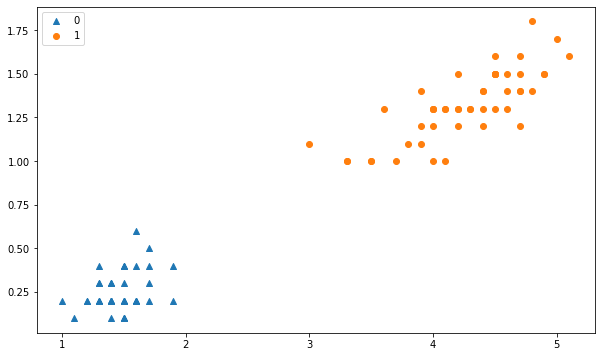

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[Y==0][:,0], X[Y==0][:,1], marker='^', label='0')
plt.scatter(X[Y==1][:,0], X[Y==1][:,1], marker='o', label='1')
plt.legend()

## **2.** Dựa vào file ‘**Logistic regression-petal-batch-sigmoid.ipynb**’, cài đặt lại theo 1-sample và m-sample.


> **$-$1-Sample**



In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def forward(x, theta):
    return sigmoid(np.dot(theta.T, x))

def compute_loss(y_hat, y):
    return (-y*math.log(y_hat) - (1-y)*math.log(1-y_hat))

def compute_gradient(x, y_hat, y):
    return x*(y_hat - y)

def update_params(theta, grad, eta):
    return theta - eta*grad

In [ ]:
eta = 0.005
n_epochs = 50
losses = []
accuracy = []

theta = np.random.randn(X.shape[1], 1)

for epoch in range(n_epochs):
    inds = np.arange(X_train.shape[0])
    np.random.shuffle(inds)
    X_train = X_train[inds]
    Y_train = Y_train[inds]
    
    for i in tqdm(range(train_size), desc='Samples'):
        x = X_train[i].T.reshape(X.shape[1], 1)
        y = Y_train[i]
        
        y_hat = forward(x, theta)
        print('y_hat: {}'.format(y_hat))

        loss = compute_loss(y_hat, y)
        print('loss: {}'.format(loss))
        losses.append(loss)

        grad = compute_gradient(x, y_hat, y)

        theta = update_params(theta, grad, eta)
        
        predict = np.where(forward(X_train.T, theta)>=0.5, 1, 0)
        acc = np.where(predict==Y_train.T, 1, 0)
        print(acc)
        acc = np.sum(acc, axis=1)/train_size
        print('Accuracy: {}'.format(acc))
        accuracy.append(acc)

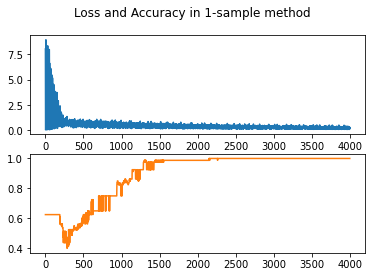

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Loss and Accuracy in 1-sample method')
ax1.plot(losses, 'tab:blue')
ax2.plot(accuracy, 'tab:orange')

> **$-$m-Sample**



In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def forward(x, theta):
    return sigmoid(np.dot(theta.T, x))

def compute_loss(y_hat, y, batch_size):
    print('Loss shape b4 sum', (-np.multiply(y, np.log(y_hat)) - np.multiply(1-y, np.log(1-y_hat)).shape)
    return np.sum(-np.multiply(y, np.log(y_hat)) - np.multiply(1-y, np.log(1-y_hat)), axis=1)/batch_size

def compute_gradient(x, y_hat, y, batch_size):
    return np.dot(x, (y_hat - y).T)

def update_params(theta, grad, eta):
    return theta - eta*grad

In [ ]:
eta = 0.005
n_epochs = 50
m = 32
losses = []
accuracy = []
theta = np.random.randn(X.shape[1], 1)
for epoch in range(n_epochs):
    inds = np.arange(X_train.shape[0])
    np.random.shuffle(inds)
    X_train = X_train[inds]
    Y_train = Y_train[inds]
    for i in tqdm(range(0, train_size, m), desc='Mini-batches'):
        if i+m > X_train.shape[0]:
            batch_size = X_train.shape[0]-i
        else:
            batch_size = m

        x = X_train[i:i+batch_size].T.reshape(X.shape[1], batch_size)
        y = Y_train[i:i+batch_size].T.reshape(1, batch_size)

        y_hat = forward(x, theta)

        loss = compute_loss(y_hat, y, batch_size)
        print('Loss: ', loss)
        losses.append(loss)

        grad = compute_gradient(x, y_hat, y, batch_size)

        theta = update_params(theta, grad, eta)

        # Accuracy
        predict = np.where(forward(X_train.T, theta)>=0.5, 1, 0)
        acc = np.where(predict==Y_train.T, 1, 0)
        acc = np.sum(acc, axis=1)/train_size
        print('Accuracy: {}'.format(acc))
        accuracy.append(acc)

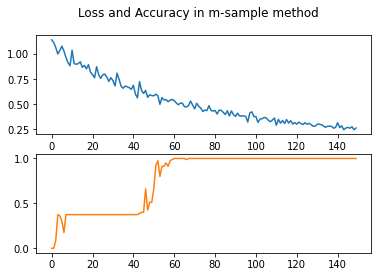

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Loss and Accuracy in m-sample method')
ax1.plot(losses, 'tab:blue')
ax2.plot(accuracy, 'tab:orange')

In [ ]:
predict_test = np.where(forward(X_test.T, theta) >= 0.5, 1, 0)
acc_test = np.where(predict_test == Y_test.T, 1, 0)
acc_test = np.sum(acc_test, axis=1)/X_test.shape[0]
print('Accuracy in test set: {}'.format(acc_test))

Accuracy in test set: [1.]


# **3.** Dựa vào file ‘**Logistic regression-petal-batch-sigmoid.ipynb**’, cài đặt lại bài toán phân loại nhị phân dùng hàm tanh.

In [ ]:
def tanh(z):
    return 1 - 2/(np.exp(2*z)+1)

def forward_tanh(x, theta):
    return tanh(np.dot(theta.T, x))

def compute_tanh_loss(y_hat, y, batch_size):
    return np.sum(-np.multiply(y, np.log(y_hat)) - np.multiply(1-y, np.log(1-y_hat)), axis=1)/batch_size

def compute_tanh_grad(x, y_hat, y, batch_size):
    y_func = np.multiply(y_hat-y, 1+y)/y_hat
    return 1/batch_size * np.dot(x, y_func.T)

def update_params(theta, grad, eta):
    return theta - eta*grad

In [ ]:
eta = 0.001
n_epochs = 100
m = 32
theta = np.random.randn(X.shape[1], 1)

losses = []
accuracy = []

for epoch in range(n_epochs):
    inds = np.arange(X_train.shape[0])
    np.random.shuffle(inds)
    X_train = X_train[inds]
    Y_train = Y_train[inds]
    
    for i in tqdm(range(0, train_size, m), desc='Mini-batches'):
        if i+m > X_train.shape[0]:
            batch_size = X_train.shape[0]-i
        else:
            batch_size = m

        x = X_train[i:i+batch_size].T.reshape(X.shape[1], batch_size)
        y = Y_train[i:i+batch_size].T.reshape(1, batch_size)

        y_hat = forward_tanh(x, theta)
        y_hat = (y_hat + 1)/2 # processing y_hat
        
        loss = compute_tanh_loss(y_hat, y, batch_size)
        print('Loss: ', loss)
        losses.append(loss)

        grad = compute_tanh_grad(x, y_hat, y, batch_size)

        theta = update_params(theta, grad, eta)

        # Accuracy
        predict = (forward_tanh(X_train.T, theta) + 1)/2
        predict = np.where(predict >= 0.5, 1, 0)
        acc = np.where(predict==Y_train.T, 1, 0)
        acc = np.sum(acc, axis=1)/train_size
        print('Accuracy: {}'.format(acc))
        accuracy.append(acc)

Mini-batches:   0%|          | 0/3 [00:00<?, ?it/s]

Loss:  [0.7911242]
Accuracy: [0.625]
Loss:  [0.60709731]
Accuracy: [0.625]
Loss:  [0.63595692]
Accuracy: [0.625]
Loss:  [0.5544671]
Accuracy: [0.625]
Loss:  [0.58768976]
Accuracy: [0.625]
Loss:  [0.64178905]
Accuracy: [0.625]
Loss:  [0.46306936]
Accuracy: [0.625]
Loss:  [0.62196777]
Accuracy: [0.625]
Loss:  [0.42181716]
Accuracy: [0.625]
Loss:  [0.54391373]
Accuracy: [0.625]
Loss:  [0.42184493]
Accuracy: [0.6375]
Loss:  [0.4374182]
Accuracy: [0.6375]
Loss:  [0.53197764]
Accuracy: [0.65]
Loss:  [0.26297022]
Accuracy: [0.65]
Loss:  [0.60471643]
Accuracy: [0.65]
Loss:  [0.34433163]
Accuracy: [0.6625]
Loss:  [0.50927895]
Accuracy: [0.6625]
Loss:  [0.33636499]
Accuracy: [0.6625]
Loss:  [0.28056958]
Accuracy: [0.6625]
Loss:  [0.42136951]
Accuracy: [0.6875]
Loss:  [0.53605786]
Accuracy: [0.7625]
Loss:  [0.32609981]
Accuracy: [0.7625]
Loss:  [0.38569724]
Accuracy: [0.7625]
Loss:  [0.41218623]
Accuracy: [0.8]
Loss:  [0.324617]
Accuracy: [0.825]
Loss:  [0.38655009]
Accuracy: [0.825]
Loss:  [0.33

Mini-batches: 100%|██████████| 3/3 [00:00<00:00, 692.89it/s]

Loss:  [0.26756414]
Accuracy: [0.9625]
Loss:  [0.27141788]
Accuracy: [0.9625]
Loss:  [0.1911707]
Accuracy: [0.9625]
Loss:  [0.27374456]
Accuracy: [0.9625]
Loss:  [0.23046933]
Accuracy: [0.9625]
Loss:  [0.2510009]
Accuracy: [0.9625]
Loss:  [0.23301584]
Accuracy: [0.9625]
Loss:  [0.239831]
Accuracy: [0.9625]
Loss:  [0.3026417]
Accuracy: [0.9625]
Loss:  [0.25583118]
Accuracy: [0.9625]
Loss:  [0.22683838]
Accuracy: [0.9625]
Loss:  [0.27090939]
Accuracy: [0.9625]
Loss:  [0.27337894]
Accuracy: [0.9625]
Loss:  [0.23581075]
Accuracy: [0.9625]
Loss:  [0.20627255]
Accuracy: [0.9625]
Loss:  [0.24433942]
Accuracy: [0.9625]
Loss:  [0.26292896]
Accuracy: [0.9625]
Loss:  [0.20179325]
Accuracy: [0.9625]
Loss:  [0.25784932]
Accuracy: [0.9625]
Loss:  [0.23400351]
Accuracy: [0.9625]
Loss:  [0.22500842]
Accuracy: [0.9625]
Loss:  [0.25363814]
Accuracy: [0.9625]
Loss:  [0.19807983]
Accuracy: [0.9625]
Loss:  [0.29870206]
Accuracy: [0.9625]
Loss:  [0.21446523]
Accuracy: [0.9625]
Loss:  [0.26401977]
Accuracy: 


Mini-batches:   0%|          | 0/3 [00:00<?, ?it/s]

Loss:  [0.2333525]
Accuracy: [1.]
Loss:  [0.22286451]
Accuracy: [1.]
Loss:  [0.1986552]
Accuracy: [1.]
Loss:  [0.22964692]
Accuracy: [1.]
Loss:  [0.21030077]
Accuracy: [1.]
Loss:  [0.2281455]
Accuracy: [1.]
Loss:  [0.23445487]
Accuracy: [1.]
Loss:  [0.21102289]
Accuracy: [1.]
Loss:  [0.21303539]
Accuracy: [1.]
Loss:  [0.20845819]
Accuracy: [1.]
Loss:  [0.22907274]
Accuracy: [1.]
Loss:  [0.22563482]
Accuracy: [1.]
Loss:  [0.20629525]
Accuracy: [1.]
Loss:  [0.2337193]
Accuracy: [1.]
Loss:  [0.21654191]
Accuracy: [1.]
Loss:  [0.24072712]
Accuracy: [1.]
Loss:  [0.19843454]
Accuracy: [1.]
Loss:  [0.21448381]
Accuracy: [1.]
Loss:  [0.24344499]
Accuracy: [1.]
Loss:  [0.18041524]
Accuracy: [1.]
Loss:  [0.24252116]
Accuracy: [1.]
Loss:  [0.20850644]
Accuracy: [1.]
Loss:  [0.22317737]
Accuracy: [1.]
Loss:  [0.22271793]
Accuracy: [1.]
Loss:  [0.24333394]
Accuracy: [1.]
Loss:  [0.19660225]
Accuracy: [1.]
Loss:  [0.20301706]
Accuracy: [1.]
Loss:  [0.21450496]
Accuracy: [1.]
Loss:  [0.22034859]
Accu

Mini-batches:   0%|          | 0/3 [00:00<?, ?it/s]

Loss:  [0.21568635]
Accuracy: [1.]
Loss:  [0.22697117]
Accuracy: [1.]
Loss:  [0.16360593]
Accuracy: [1.]
Loss:  [0.21439361]
Accuracy: [1.]
Loss:  [0.20896993]
Accuracy: [1.]
Loss:  [0.2014849]
Accuracy: [1.]
Loss:  [0.20982389]
Accuracy: [1.]
Loss:  [0.20517985]
Accuracy: [1.]
Loss:  [0.21666144]
Accuracy: [1.]
Loss:  [0.22426053]
Accuracy: [1.]
Loss:  [0.19766752]
Accuracy: [1.]
Loss:  [0.20062492]
Accuracy: [1.]
Loss:  [0.22667112]
Accuracy: [1.]
Loss:  [0.19367451]
Accuracy: [1.]
Loss:  [0.20236208]
Accuracy: [1.]
Loss:  [0.19856899]
Accuracy: [1.]
Loss:  [0.22879644]
Accuracy: [1.]
Loss:  [0.18699124]
Accuracy: [1.]
Loss:  [0.18783351]
Accuracy: [1.]
Loss:  [0.22058703]
Accuracy: [1.]
Loss:  [0.22394261]
Accuracy: [1.]
Loss:  [0.19508188]
Accuracy: [1.]
Loss:  [0.23750389]
Accuracy: [1.]
Loss:  [0.1736823]
Accuracy: [1.]
Loss:  [0.21632979]
Accuracy: [1.]
Loss:  [0.22613811]
Accuracy: [1.]
Loss:  [0.15212165]
Accuracy: [1.]
Loss:  [0.20449862]
Accuracy: [1.]
Loss:  [0.21050354]
Ac

Mini-batches: 100%|██████████| 3/3 [00:00<00:00, 753.69it/s]

Loss:  [0.18383979]
Accuracy: [1.]
Loss:  [0.21196532]
Accuracy: [1.]
Loss:  [0.23341023]
Accuracy: [1.]
Loss:  [0.20870913]
Accuracy: [1.]
Loss:  [0.1924691]
Accuracy: [1.]
Loss:  [0.21914969]
Accuracy: [1.]
Loss:  [0.2145829]
Accuracy: [1.]
Loss:  [0.20801187]
Accuracy: [1.]
Loss:  [0.1747804]
Accuracy: [1.]
Loss:  [0.2137318]
Accuracy: [1.]
Loss:  [0.19797844]
Accuracy: [1.]
Loss:  [0.19545827]
Accuracy: [1.]
Loss:  [0.19767387]
Accuracy: [1.]
Loss:  [0.1998822]
Accuracy: [1.]
Loss:  [0.22275594]
Accuracy: [1.]
Loss:  [0.21815678]
Accuracy: [1.]
Loss:  [0.19739439]
Accuracy: [1.]
Loss:  [0.18537762]
Accuracy: [1.]
Loss:  [0.20301296]
Accuracy: [1.]
Loss:  [0.18482258]
Accuracy: [1.]
Loss:  [0.24045969]
Accuracy: [1.]
Loss:  [0.20539034]
Accuracy: [1.]
Loss:  [0.20448411]
Accuracy: [1.]
Loss:  [0.19389398]
Accuracy: [1.]
Loss:  [0.22662475]
Accuracy: [1.]
Loss:  [0.18950655]
Accuracy: [1.]
Loss:  [0.18021157]
Accuracy: [1.]
Loss:  [0.1826969]
Accuracy: [1.]
Loss:  [0.24520735]
Accura

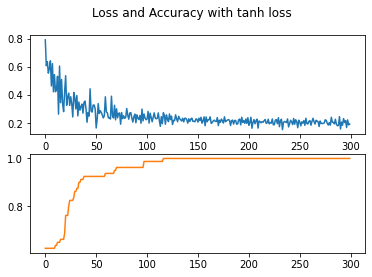

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Loss and Accuracy with tanh loss')
ax1.plot(losses, 'tab:blue')
ax2.plot(accuracy, 'tab:orange')

In [ ]:
predict_test = (forward_tanh(X_test.T, theta) + 1)/2
predict_test = np.where(predict_test >= 0.5, 1, 0)
acc_test = np.where(predict_test == Y_test.T, 1, 0)
acc_test = np.sum(acc_test, axis=1)/X_test.shape[0]
print('Accuracy in test set: {}'.format(acc_test))

Accuracy in test set: [1.]


# **4.** Dựa vào file ‘**Logistic regression-petal-batch-sigmoid.ipynb**’, cài đặt lại bài toán phân loại nhị phân dùng MSE (L2 loss).

In [ ]:
def forward(x, theta):
    return np.dot(theta.T, x)

def compute_MSE_loss(y_hat, y, batch_size):
    return np.sum(np.multiply(y_hat-y, y_hat-y), axis=1)/batch_size

def compute_MSE_grad(x, y_hat, y, batch_size):
    y_func = (y_hat-y)*(1-y_hat)*y_hat
    return 2*np.dot(x, y_func.T)/batch_size

def update_params(theta, grad, eta):
    return theta - eta*grad

In [ ]:
# Normalize data
data_norm = data
data_norm[:, :2] = (data_norm[:, :2] - np.mean(data_norm[:, :2]))/np.std(data_norm[:, :2])

X_norm = data_norm[:,:2]
X_norm = np.concatenate((X_norm, np.ones((X_norm.shape[0], 1))), axis=1)
Y_norm = data_norm[:,2]


In [ ]:
eta = 0.0001
n_epochs = 50
m = 16
theta = np.random.randn(X_norm.shape[1], 1)

losses = []
accuracy = []

for epoch in range(n_epochs):
    inds = np.arange(X_norm.shape[0])
    np.random.shuffle(inds)
    X_norm = X_norm[inds]
    Y_norm = Y_norm[inds]
    
    for i in tqdm(range(0, X_norm.shape[1], m), desc='Mini-batches'):
        if i+m > X_norm.shape[0]:
            batch_size = X_norm.shape[0]-i
        else:
            batch_size = m

        x = X_norm[i:i+batch_size].T.reshape(X_norm.shape[1], batch_size)
        y = Y_norm[i:i+batch_size].T.reshape(1, batch_size)

        y_hat = forward(x, theta)
        
        loss = compute_MSE_loss(y_hat, y, batch_size)
        print('Loss: ', loss)
        losses.append(loss)

        grad = compute_MSE_grad(x, y_hat, y, batch_size)

        theta = update_params(theta, grad, eta)

        # Accuracy
        predict = np.where(forward(X_norm.T, theta)>=0, 1, 0)
        acc = np.where(predict==Y_norm.T, 1, 0)
        acc = np.sum(acc, axis=1)/X_norm.shape[0]
        print('Accuracy: {}'.format(acc))
        accuracy.append(acc)

Mini-batches: 100%|██████████| 1/1 [00:00<00:00, 1356.06it/s]


Loss:  [7.0695376]
Accuracy: [0.1]
Loss:  [6.04378434]
Accuracy: [0.1]
Loss:  [7.21102166]
Accuracy: [0.1]
Loss:  [8.04877405]
Accuracy: [0.1]
Loss:  [7.31667815]
Accuracy: [0.1]
Loss:  [9.86393629]
Accuracy: [0.1]
Loss:  [9.27981254]
Accuracy: [0.11]
Loss:  [9.87348325]
Accuracy: [0.11]
Loss:  [4.36427931]
Accuracy: [0.11]
Loss:  [8.25603335]
Accuracy: [0.11]
Loss:  [7.05633476]
Accuracy: [0.11]
Loss:  [9.01871113]
Accuracy: [0.11]
Loss:  [6.14333249]
Accuracy: [0.11]
Loss:  [10.93607206]
Accuracy: [0.11]
Loss:  [10.60827755]
Accuracy: [0.11]
Loss:  [7.15114431]
Accuracy: [0.11]
Loss:  [7.83576041]
Accuracy: [0.12]
Loss:  [12.42198252]
Accuracy: [0.12]
Loss:  [9.97876191]
Accuracy: [0.12]
Loss:  [9.1130516]
Accuracy: [0.17]
Loss:  [11.79357651]
Accuracy: [0.17]
Loss:  [9.16639134]
Accuracy: [0.17]
Loss:  [7.44792148]
Accuracy: [0.17]
Loss:  [8.88016297]
Accuracy: [0.17]
Loss:  [4.55349587]
Accuracy: [0.17]
Loss:  [7.87088723]
Accuracy: [0.17]
Loss:  [9.24944808]
Accuracy: [0.17]
Loss:

Mini-batches: 100%|██████████| 1/1 [00:00<00:00, 704.33it/s]

Loss:  [9.59761382]
Accuracy: [0.17]
Loss:  [9.25485237]
Accuracy: [0.18]
Loss:  [11.15303234]
Accuracy: [0.27]
Loss:  [10.48337157]
Accuracy: [0.27]
Loss:  [14.00202442]
Accuracy: [0.27]
Loss:  [10.3649808]
Accuracy: [0.27]
Loss:  [9.09978523]
Accuracy: [0.27]
Loss:  [8.74400893]
Accuracy: [0.27]
Loss:  [13.4225826]
Accuracy: [0.27]
Loss:  [12.7970236]
Accuracy: [0.27]
Loss:  [7.34347858]
Accuracy: [0.27]
Loss:  [12.08694362]
Accuracy: [0.27]
Loss:  [15.36806561]
Accuracy: [0.27]
Loss:  [13.34364852]
Accuracy: [0.31]
Loss:  [10.96672384]
Accuracy: [0.31]
Loss:  [11.25869641]
Accuracy: [0.39]
Loss:  [9.04793411]
Accuracy: [0.41]
Loss:  [7.16209856]
Accuracy: [0.41]
Loss:  [14.76657256]
Accuracy: [0.41]
Loss:  [17.7607506]
Accuracy: [0.41]


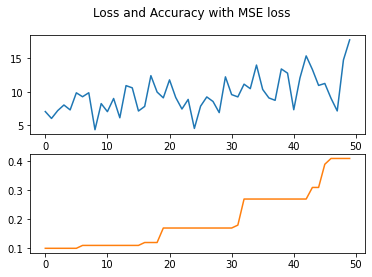

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Loss and Accuracy with MSE loss')
ax1.plot(losses, 'tab:blue')
ax2.plot(accuracy, 'tab:orange')

# **5.** Cài đặt bài toán phân loại nhị phân cho data iris (**iris_full.csv**) có 4 feature.



> **Getting data**





In [ ]:
data_path = './iris_full.csv'
data = np.genfromtxt(data_path, delimiter=',', skip_header=1)
X = data[:, 0:data.shape[1]-1]
X = np.concatenate((X, np.ones((data.shape[0], 1))), axis=1)
Y = data[:, data.shape[1]-1].reshape(data.shape[0], 1)

n_features = data.shape[1] - 1      # Exclude bias

train_size = round(data.shape[0]*0.8)

X_train = X[0:train_size]
Y_train = Y[0:train_size]

X_test = X[train_size:]
Y_test = Y[train_size:]

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def forward(x, theta):
    return sigmoid(np.dot(theta.T, x))

def compute_loss(y_hat, y, batch_size):
    return np.sum(-np.multiply(y, np.log(y_hat)) - np.multiply(1-y, np.log(1-y_hat)), axis=1)/batch_size

def compute_gradient(x, y_hat, y, batch_size):
    return np.dot(x, (y_hat - y).T)

def update_params(theta, grad, eta):
    return theta - eta*grad

In [ ]:
eta = 0.005
n_epochs = 50
m = 32
losses = []
accuracy = []
theta = np.random.randn(X.shape[1], 1)
for epoch in range(n_epochs):
    inds = np.arange(X_train.shape[0])
    np.random.shuffle(inds)
    X_train = X_train[inds]
    Y_train = Y_train[inds]
    
    for i in tqdm(range(0, train_size, m), desc='Mini-batches'):
        if i+m > X_train.shape[0]:
            batch_size = X_train.shape[0]-i
        else:
            batch_size = m

        x = X_train[i:i+batch_size].T.reshape(X.shape[1], batch_size)
        y = Y_train[i:i+batch_size].T.reshape(1, batch_size)

        y_hat = forward(x, theta)

        loss = compute_loss(y_hat, y, batch_size)
        print('Loss: ', loss)
        losses.append(loss)

        grad = compute_gradient(x, y_hat, y, batch_size)

        theta = update_params(theta, grad, eta)

        # Accuracy
        predict = np.where(forward(X_train.T, theta)>=0.5, 1, 0)
        acc = np.where(predict==Y_train.T, 1, 0)
        acc = np.sum(acc, axis=1)/train_size
        print('Accuracy: {}'.format(acc))
        accuracy.append(acc)

Mini-batches: 100%|██████████| 3/3 [00:00<00:00, 737.61it/s]

Loss:  [2.19959229]
Accuracy: [0.0125]
Loss:  [1.61941923]
Accuracy: [0.1375]
Loss:  [1.80693487]
Accuracy: [0.]
Loss:  [1.3490916]
Accuracy: [0.625]
Loss:  [1.4842441]
Accuracy: [0.]
Loss:  [1.12725834]
Accuracy: [0.0125]
Loss:  [1.14646877]
Accuracy: [0.625]
Loss:  [1.47330771]
Accuracy: [0.375]
Loss:  [1.06682135]
Accuracy: [0.1375]
Loss:  [0.80038393]
Accuracy: [0.625]
Loss:  [0.9009807]
Accuracy: [0.375]
Loss:  [0.92470156]
Accuracy: [0.75]
Loss:  [0.59482744]
Accuracy: [1.]
Loss:  [0.53313642]
Accuracy: [0.9625]
Loss:  [0.46646833]
Accuracy: [0.7]
Loss:  [0.52844329]
Accuracy: [0.75]
Loss:  [0.5535476]
Accuracy: [0.625]
Loss:  [0.49242557]
Accuracy: [0.9625]
Loss:  [0.32705206]
Accuracy: [0.9125]
Loss:  [0.43636244]
Accuracy: [0.975]
Loss:  [0.38888169]
Accuracy: [1.]
Loss:  [0.32216388]
Accuracy: [0.975]
Loss:  [0.30022846]
Accuracy: [1.]
Loss:  [0.28371866]
Accuracy: [1.]
Loss:  [0.26367908]
Accuracy: [1.]
Loss:  [0.24510854]
Accuracy: [1.]
Loss:  [0.23753547]
Accuracy: [1.]
Lo


Mini-batches:   0%|          | 0/3 [00:00<?, ?it/s]

Loss:  [0.08816297]
Accuracy: [1.]
Loss:  [0.08926129]
Accuracy: [1.]
Loss:  [0.06220288]
Accuracy: [1.]
Loss:  [0.09439097]
Accuracy: [1.]
Loss:  [0.08066068]
Accuracy: [1.]
Loss:  [0.05867559]
Accuracy: [1.]
Loss:  [0.07636638]
Accuracy: [1.]
Loss:  [0.07471623]
Accuracy: [1.]
Loss:  [0.07687722]
Accuracy: [1.]
Loss:  [0.07258213]
Accuracy: [1.]
Loss:  [0.07926053]
Accuracy: [1.]
Loss:  [0.05814923]
Accuracy: [1.]
Loss:  [0.07021756]
Accuracy: [1.]
Loss:  [0.0661662]
Accuracy: [1.]
Loss:  [0.07592517]
Accuracy: [1.]
Loss:  [0.06522571]
Accuracy: [1.]
Loss:  [0.07356976]
Accuracy: [1.]
Loss:  [0.05744776]
Accuracy: [1.]
Loss:  [0.06271619]
Accuracy: [1.]
Loss:  [0.05537981]
Accuracy: [1.]
Loss:  [0.08318878]
Accuracy: [1.]
Loss:  [0.05904891]
Accuracy: [1.]
Loss:  [0.06618779]
Accuracy: [1.]
Loss:  [0.05909091]
Accuracy: [1.]
Loss:  [0.06617003]
Accuracy: [1.]
Loss:  [0.06035913]
Accuracy: [1.]
Loss:  [0.04537904]
Accuracy: [1.]
Loss:  [0.06326321]
Accuracy: [1.]
Loss:  [0.05413804]
A

Mini-batches: 100%|██████████| 3/3 [00:00<00:00, 436.54it/s]

Loss:  [0.05321506]
Accuracy: [1.]
Loss:  [0.0386745]
Accuracy: [1.]
Loss:  [0.03934008]
Accuracy: [1.]
Loss:  [0.04432112]
Accuracy: [1.]
Loss:  [0.0442522]
Accuracy: [1.]
Loss:  [0.04002549]
Accuracy: [1.]
Loss:  [0.05282998]
Accuracy: [1.]
Loss:  [0.03552937]
Accuracy: [1.]
Loss:  [0.03578046]
Accuracy: [1.]
Loss:  [0.03365221]
Accuracy: [1.]
Loss:  [0.04672242]
Accuracy: [1.]
Loss:  [0.04748884]
Accuracy: [1.]
Loss:  [0.04352983]
Accuracy: [1.]
Loss:  [0.04379212]
Accuracy: [1.]
Loss:  [0.0278492]
Accuracy: [1.]
Loss:  [0.03666849]
Accuracy: [1.]
Loss:  [0.03921014]
Accuracy: [1.]
Loss:  [0.04599191]
Accuracy: [1.]
Loss:  [0.03389053]
Accuracy: [1.]
Loss:  [0.04171512]
Accuracy: [1.]
Loss:  [0.04263054]
Accuracy: [1.]
Loss:  [0.03517573]
Accuracy: [1.]
Loss:  [0.04045172]
Accuracy: [1.]
Loss:  [0.03791667]
Accuracy: [1.]
Loss:  [0.03804221]
Accuracy: [1.]
Loss:  [0.03988607]
Accuracy: [1.]
Loss:  [0.02992802]
Accuracy: [1.]
Loss:  [0.03318533]
Accuracy: [1.]
Loss:  [0.04318286]
Acc

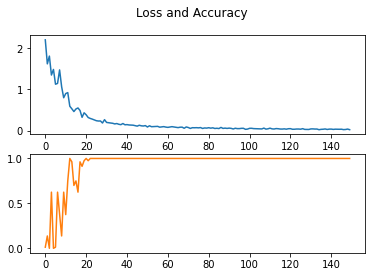

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Loss and Accuracy')
ax1.plot(losses, 'tab:blue')
ax2.plot(accuracy, 'tab:orange')

In [ ]:
predict_test = np.where(forward(X_test.T, theta) >= 0.5, 1, 0)
acc_test = np.where(predict_test == Y_test.T, 1, 0)
acc_test = np.sum(acc_test, axis=1)/X_test.shape[0]
print('Accuracy in test set: {}'.format(acc_test))

Accuracy in test set: [1.]
